In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
rows, cols = 28, 28

# Reshape the data into a 4D Array
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

input_shape = (rows,cols,1)

# Set type as float32 and normalize the values to [0,1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# Transform labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)

In [ ]:
def build_lenet(input_shape):
  # Define Sequential Model
  model = tf.keras.Sequential()

  # C1 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', input_shape=input_shape))

  # S2 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C3 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh'))

  # S4 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C5 Fully Connected Layer
  model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

  # Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
  model.add(tf.keras.layers.Flatten())

  # FC6 Fully Connected Layers
  model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

  # Output Layer
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  return model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 50ms/step - accuracy: 0.8341 - loss: 0.5789
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9517 - loss: 0.1626
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9681 - loss: 0.1103
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.9755 - loss: 0.0825
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.9799 - loss: 0.0669
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9830 - loss: 0.0579
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9852 - loss: 0.0499
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9877 - loss: 0.0425
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9882 - loss: 0.0389
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.9892 - loss: 0.0352
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9908 - loss: 0.0312
Epoch 12/20
469/469 ━━━━━━━━━━

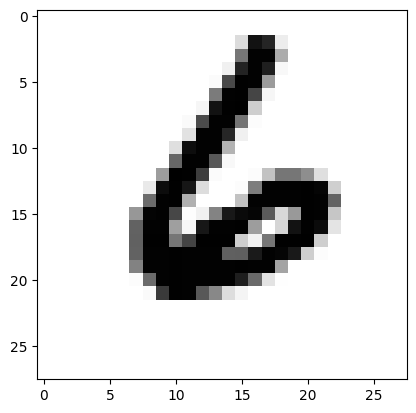

In [ ]:
lenet = build_lenet(input_shape)

# Compile the model
lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# We will be allowing 10 itterations to happen
epochs = 20
history = lenet.fit(x_train, y_train, epochs=epochs,batch_size=128, verbose=1)

# Check Accuracy of the Model
# Transform labels to one hot encoding
if len(y_test.shape) != 2 or y_test.shape[1] != 10:
  y_test = tf.keras.utils.to_categorical(y_test, 10)

loss ,acc= lenet.evaluate(x_test, y_test)
print('Accuracy : ', acc)

# Plot the Image
image_index = 8888
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')

# Make Prediction
pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1 ))
print(pred.argmax())

In [ ]:
lenet.save('lenet_mnist_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Label: 7


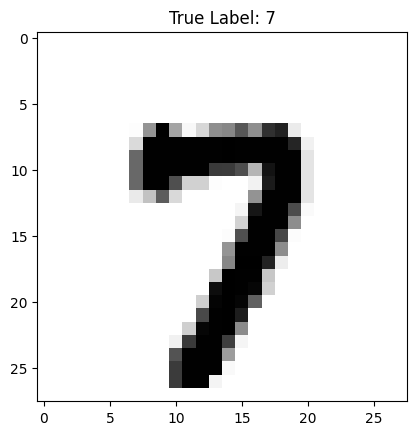

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Label: 9


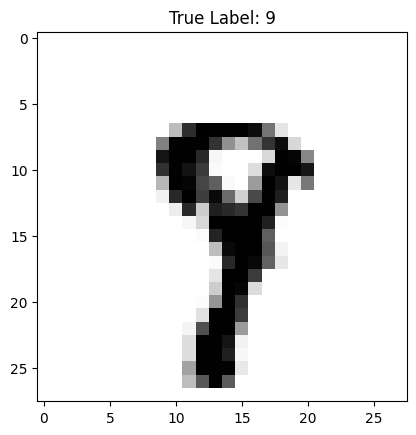

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Label: 8


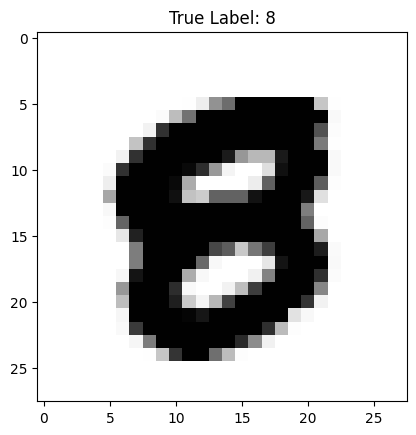

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Label: 9


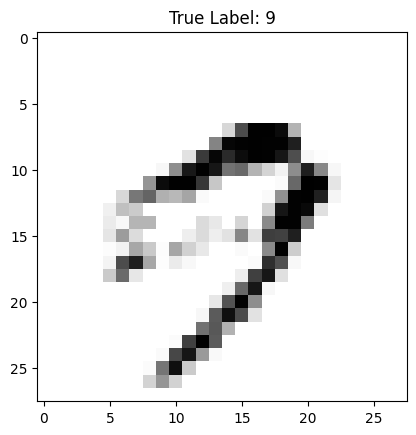

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Label: 9


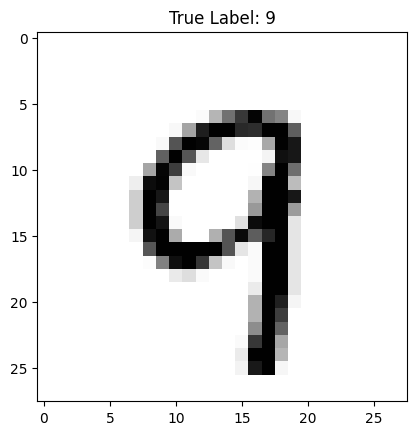

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_images_to_display = 5

for i in range(num_images_to_display):
  image_index = np.random.randint(0, len(x_test))
  plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
  plt.title(f"True Label: {np.argmax(y_test[image_index])}")

  pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1 ))
  print(f"Predicted Label: {pred.argmax()}")
  plt.show()